# Mesure du Flux 

- Utilisation de la sonde AXUV100, réglage du gain du phantom sur $10^7$ en mode **Low**
- Synchrotron: 450 Ma
- Mesures effectuées à la main avec le multimètre le 14/09/2023

- Les fentes sont à 0.3 et 0.3 sur l'interface horiba

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as p

In [2]:
%mkdir data
%mkdir figures

mkdir: impossible de créer le répertoire « data »: Le fichier existe
mkdir: impossible de créer le répertoire « figures »: Le fichier existe


## Numérisation des données

In [9]:
GainPhantom = 1e-7
W = list(range(200, 340+5, 5))
V = [7.1e-1,
     1.02,
     1.14,
     1.24,
     1.43,
     1.72,
     2.07,
     2.42,
     2.76,
     3.17,
     3.57,
     3.98,
     4.39,
     4.87,
     5.34,
     5.73,
     5.92,
     6.0,
     5.70,
     5.08,
     4.40,
     3.95,
     3.64,
     3.41,
     3.26,
     3.14,
     3.06,
     2.99,
     2.94
]

data = p.DataFrame({'W (nm)': W, 
                    'V (V)': V
                   })
data.to_csv('./data/data_diode_polypheme_14092023.csv')
data

W (nm)  V (V)
0      200   0.71
1      205   1.02
2      210   1.14
3      215   1.24
4      220   1.43
5      225   1.72
6      230   2.07
7      235   2.42
8      240   2.76
9      245   3.17
10     250   3.57
11     255   3.98
12     260   4.39
13     265   4.87
14     270   5.34
15     275   5.73
16     280   5.92
17     285   6.00
18     290   5.70
19     295   5.08
20     300   4.40
21     305   3.95
22     310   3.64
23     315   3.41
24     320   3.26
25     325   3.14
26     330   3.06
27     335   2.99
28     340   2.94

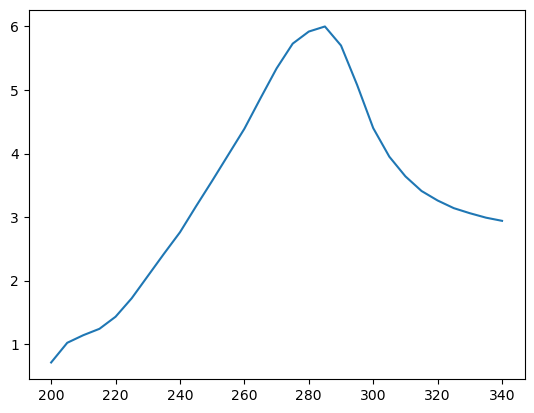

In [10]:
plt.plot(data['W (nm)'], data['V (V)'])

## Chargement des courbes de calibration de la diode

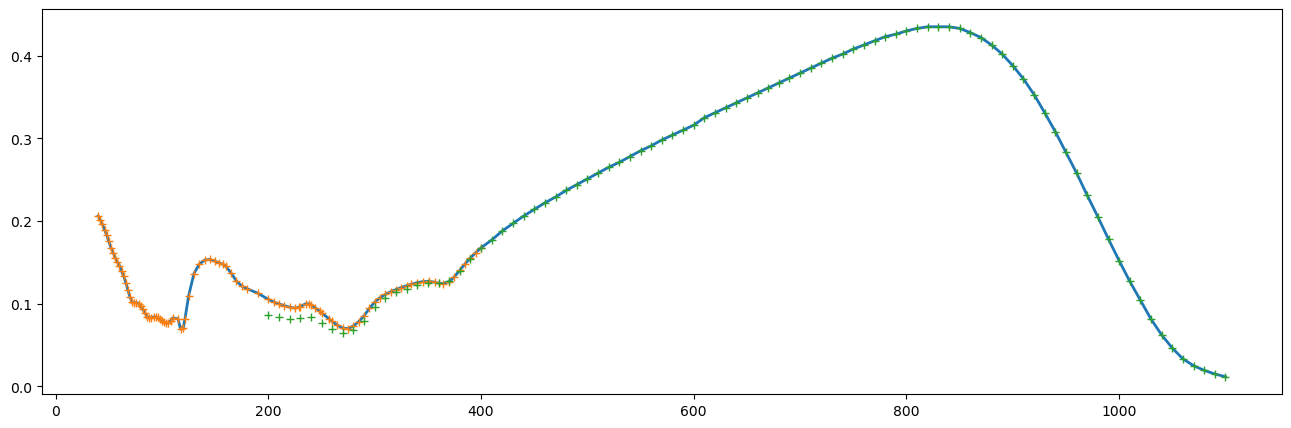

In [11]:
calibUV = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_40-400nm.csv', skiprows=4, names=('W (nm)', 'R (A/W)'))
calibVIS = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_200-1100nm.csv', skiprows=4, names=('W (nm)', 'reflectance', 'R (A/W)', 'External QR', 'Internal QE'))

# On met ensemble les deux séries on prend calibUV puis à la fin on enchaine sur calibVIS
calibMerged = p.concat((calibUV, calibVIS[calibVIS['W (nm)'] > calibUV['W (nm)'].max()]))

# Plot pour voir 
plt.figure(figsize=(16,5))
plt.plot(calibMerged['W (nm)'], calibMerged['R (A/W)'], '-', lw=2)
plt.plot(calibUV['W (nm)'], calibUV['R (A/W)'], '+')
plt.plot(calibVIS['W (nm)'], calibVIS['R (A/W)'], '+')

## Convertion des données pour avoir l'intensité, la puissance et le Flux

- Le flux de photons $\phi$ unité $\frac{photons}{s\, m^2}$ soit des photons par second métres carrés
$$ H = \phi \times \frac{hc}{\lambda}$$
Avec $H$ la puissance par mètre carré $[W/m^2]$, $h$ la constant de Plank, $c$ la célérité de la lumière, et $\lambda$ la longueur d'onde

In [12]:
# Pour avoir le courant I en ampère
data['I (A)'] = data['V (V)'] * GainPhantom

# Pour avoir la puissance (on utilise la calibration que l'on interpole lineairement au bonnes longueus d'ondes)
calib = np.interp(data['W (nm)'], calibMerged['W (nm)'], calibMerged['R (A/W)'])
data['P (W)'] = data['I (A)'] / calib

h = 6.62e-34
c = 2.99e8
data['Flux'] = ( data['P (W)'] * data['W (nm)'] * 10e-9 ) / (c*h)

data.to_csv('./data/data_flux_polypheme_14092023.csv')
data

W (nm)  V (V)         I (A)         P (W)          Flux
0      200   0.71  7.100000e-08  6.749049e-07  6.819357e+12
1      205   1.02  1.020000e-07  1.000000e-06  1.035678e+13
2      210   1.14  1.140000e-07  1.143430e-06  1.213109e+13
3      215   1.24  1.240000e-07  1.271795e-06  1.381422e+13
4      220   1.43  1.430000e-07  1.494253e-06  1.660801e+13
5      225   1.72  1.720000e-07  1.818182e-06  2.066763e+13
6      230   2.07  2.070000e-07  2.147303e-06  2.495123e+13
7      235   2.42  2.420000e-07  2.424850e-06  2.878880e+13
8      240   2.76  2.760000e-07  2.796353e-06  3.390580e+13
9      245   3.17  3.170000e-07  3.364101e-06  4.163954e+13
10     250   3.57  3.570000e-07  4.015748e-06  5.071977e+13
11     255   3.98  3.980000e-07  4.755389e-06  6.126283e+13
12     260   4.39  4.390000e-07  5.585242e-06  7.336453e+13
13     265   4.87  4.870000e-07  6.591395e-06  8.824580e+13
14     270   5.34  5.340000e-07  7.606838e-06  1.037621e+14
15     275   5.73  5.730000e-07  8.209169e-06  1.140520e+14
16     280   5.92  5.920000e-07  8.098495e-06  1.145600e+14
17     285   6.00  6.000000e-07  7.662835e-06  1.103329e+14
18     290   5.70  5.700000e-07  6.674473e-06  9.778805e+13
19     295   5.08  5.080000e-07  5.387063e-06  8.028693e+13
20     300   4.40  4.400000e-07  4.322200e-06  6.550840e+13
21     305   3.95  3.950000e-07  3.681267e-06  5.672416e+13
22     310   3.64  3.640000e-07  3.273381e-06  5.126596e+13
23     315   3.41  3.410000e-07  2.980769e-06  4.743618e+13
24     320   3.26  3.260000e-07  2.783945e-06  4.500715e+13
25     325   3.14  3.140000e-07  2.627615e-06  4.314355e+13
26     330   3.06  3.060000e-07  2.514380e-06  4.191945e+13
27     335   2.99  2.990000e-07  2.417671e-06  4.091786e+13
28     340   2.94  2.940000e-07  2.344498e-06  4.027166e+13

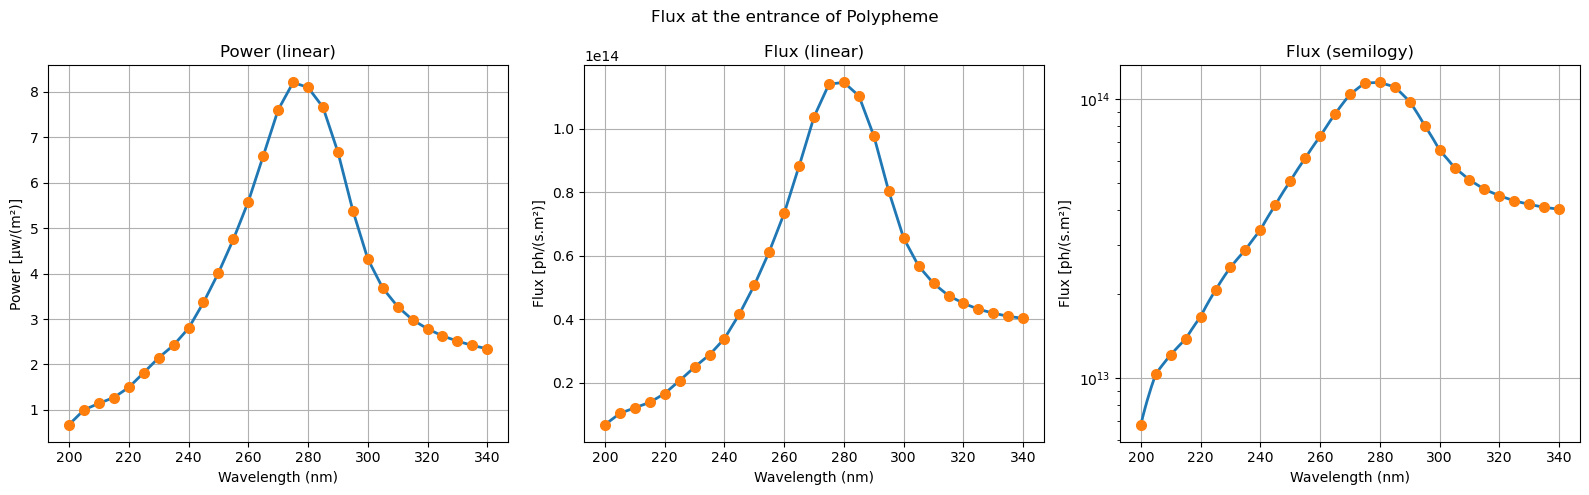

In [13]:
x = np.linspace(data['W (nm)'].min(), data['W (nm)'].max(), 200)
fit = np.interp(x, data['W (nm)'], data['Flux'])

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(data['W (nm)'], data['P (W)']*1e6, '-', lw=2)
plt.plot(data['W (nm)'], data['P (W)']*1e6, 'o', ms=7)
plt.grid()
plt.ylabel('Power [µw/(m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Power (linear)')

plt.subplot(132)
plt.plot(x, fit, lw=2)
plt.plot(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (linear)')

plt.subplot(133)
plt.semilogy(x, fit, lw=2)
plt.semilogy(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (semilogy)')

plt.suptitle('Flux at the entrance of Polypheme')
plt.tight_layout()

plt.savefig('./figures/Flux_Polypheme_14092023.pdf')
plt.savefig('./figures/Flux_Polypheme_14092023.png')